## Geburtstag


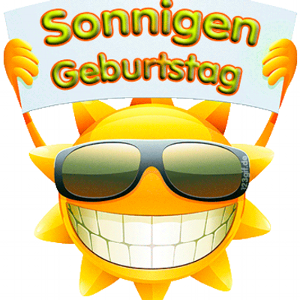


### Lernziel
Zwei DataFrames miteinander verbinden, so dass die Informationen übertragen werden können.

### Hauptaufgabe
Erstelle eine jährliche Auflistung in männlich und weiblich Geburten je Bundesstaat.

### Daten

* **birthday.csv:** Das ist der Datensatz, den wir bereits verwendet haben. Dieser kommt ursprünglich von einem R package.
* **birth.csv:** Hier handelt es sich um ein Datensatz bereitgestellt von den Zentren für Krankheitskontrolle (Centers for Disease Control, CDC). Der Datensatz ist eigentlich selbsterklärend. Jedoch kann noch genaue Informationen im Buch von VanderPlas im Kapitel 3.10.4 gefunden werden.

### To Do's
+ Daten laden
+ Daten kennenlernen
+ Daten beschreiben
+ Daten bereinigen und aufbereiten
+ Diskutieren, wie könnte ein möglicher Lösungsweg aussehen
+ Algorithmus visualisieren / Prozess beschreiben
+ Umsetzen des Algorithmus 
+ Ergebnis aufbereiten
<br>
<br>

<font color='purple'>**...bitte nicht vergessen: Kommentieren!**</font>

#### Kleiner Hinweis
Es soll angenommen werden, dass das Verhältnis von männlich und weiblich pro Jahr von der birth.csv Datei auf die Staaten der birthday.csv angewendet werden kann.


In [58]:
# import packages
import numpy as np
import pandas as pd

In [59]:
# load data
df_birthdays = pd.read_csv('birthdays.csv')
df_births = pd.read_csv('births.csv')

In [60]:
df_births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [61]:
# get info
df_births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In the column 'day' are some non-values. Therefor we are going to check if this is a problem or can be ignored.

In [62]:
df_births.day.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

In [63]:
# create df only with nan's
df_births_nan = df_births[(df_births.day.isna()) == True]

# build groupy to figure out if each of them has a year
df_births_nan.groupby('year').sum()['births']

year
1989    4045693
1990    4162917
1991    4115342
1992    4069428
1993    4004523
1994    3956925
1995    3903012
1996    3894874
1997    3884329
1998    3945192
1999    3963465
2000    4063823
2001    4031531
2002    4027376
2003    4096092
2004    4118907
2005    4145619
2006    4273225
2007    4324008
2008    4255156
Name: births, dtype: int64

We analysed that each of the nan value is still connected with the year. Therefor we can ignore this.

We could also see that in column 'day' the value 99 exists. This makes also no sense. Therefor we are going to check this as well.

In [64]:
# create df only with day = 99
df_births_99 = df_births[(df_births.day == 99) == True]

# build groupy to figure out if each of them has a year
df_births_99.groupby('year').sum()['births']

year
1969    1170
1970    2886
1971     422
1972     340
1973     422
1974     290
1975     163
1976     189
1977      83
1978      67
1979      58
1980      33
1981      35
1982      83
1983      90
1984      37
1985      10
1986      13
1987       5
1988       7
Name: births, dtype: int64

All datasets with day = 99 are still connected with the year. Therefor we can ignor this.

In [65]:
# create a table with year, gender and the sum of the births with groupby
df_births_new = df_births.groupby(['year', 'gender']).sum()['births'].reset_index()
df_births_new.head()

,year,gender,births
0,1969,F,1753634
1,1969,M,1846572
2,1970,F,1819164
3,1970,M,1918636
4,1971,F,1736774


In [66]:
# create a table with year and sum of births wit groupby
df_births_together = df_births.groupby('year').sum()['births'].reset_index().rename(
    columns={'births': 'together_births'})
df_births_together.head()

,year,together_births
0,1969,3600206
1,1970,3737800
2,1971,3563548
3,1972,3266235
4,1973,3146125


In [67]:
# merging _together and _new together
df_births_final = pd.merge(df_births_together, df_births_new, on= 'year', how = 'left',
                           validate = '1:m')
df_births_final.head()

,year,together_births,gender,births
0,1969,3600206,F,1753634
1,1969,3600206,M,1846572
2,1970,3737800,F,1819164
3,1970,3737800,M,1918636
4,1971,3563548,F,1736774


In [68]:
# adding column 'percentage' and calculate births/together_births
df_births_final['percentage'] = df_births_final.births / df_births_final.together_births
df_births_final.head()

,year,together_births,gender,births,percentage
0,1969,3600206,F,1753634,0.487093
1,1969,3600206,M,1846572,0.512907
2,1970,3737800,F,1819164,0.486694
3,1970,3737800,M,1918636,0.513306
4,1971,3563548,F,1736774,0.487372


In [69]:
# slicing df, because we only need the information of year, gender and percentage
df_births_final = df_births_final[['year', 'gender', 'percentage']]
df_births_final.head()

,year,gender,percentage
0,1969,F,0.487093
1,1969,M,0.512907
2,1970,F,0.486694
3,1970,M,0.513306
4,1971,F,0.487372


In [70]:
# to get information about the columns of df_birthdays
df_birthdays.columns

Index(['Unnamed: 0', 'state', 'year', 'month', 'day', 'date', 'wday',
       'births'],
      dtype='object')

In [71]:
# first we have to groupby the 'year' and 'state'
df_birthdays_new = df_birthdays.groupby(['year', 'state']).sum()['births'].reset_index()
df_birthdays_new.head()

,year,state,births
0,1969,AK,6824
1,1969,AL,64068
2,1969,AR,33400
3,1969,AZ,34064
4,1969,CA,352858


In [72]:
df_birthdays_new.shape

(1020, 3)

In [73]:
# now we can merge together
df_together = pd.merge(df_births_final, df_birthdays_new, on = 'year', how = 'right')
df_together.head()

,year,gender,percentage,state,births
0,1969,F,0.487093,AK,6824
1,1969,M,0.512907,AK,6824
2,1969,F,0.487093,AL,64068
3,1969,M,0.512907,AL,64068
4,1969,F,0.487093,AR,33400


In [74]:
# we expect to have now 2 x 1.020 = 2.040 rows
df_together.shape

(2040, 5)

In [81]:
# add new column wiht number of births_gender
df_together['births_gender'] = round(df_together.births * df_together.percentage)
df_together.head()

,year,gender,percentage,state,births,births_gender
0,1969,F,0.487093,AK,6824,3324.0
1,1969,M,0.512907,AK,6824,3500.0
2,1969,F,0.487093,AL,64068,31207.0
3,1969,M,0.512907,AL,64068,32861.0
4,1969,F,0.487093,AR,33400,16269.0


In [76]:
df_together.percentage.unique()

array([0.48709268, 0.51290732, 0.48669378, 0.51330622, 0.48737214,
       0.51262786, 0.48751759, 0.51248241, 0.4872985 , 0.5127015 ,
       0.4866555 , 0.5133445 , 0.48692524, 0.51307476, 0.48721067,
       0.51278933, 0.48718053, 0.51281947, 0.48717131, 0.51282869,
       0.48741055, 0.51258945, 0.48713882, 0.51286118, 0.48742393,
       0.51257607, 0.48765703, 0.51234297, 0.48734182, 0.51265818,
       0.48775523, 0.51224477, 0.48731549, 0.51268451, 0.48759817,
       0.51240183, 0.48780636, 0.51219364, 0.48781578, 0.51218422])